<a href="https://colab.research.google.com/github/rajput-t/deep_learning/blob/main/LSTM_airline_passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Passengers Forecasting with LSTM
The "Airline Passengers" dataset is a classic dataset in time series analysis and contains the monthly totals of international airline passengers from 1949 to 1960.

Based on the output from the df.head() call, it can be seen that the DataFrame include the following columns:

Month: This column contains the date in a 'YYYY-MM' format, representing the month and year.
Passengers: This column contains the number of international airline passengers for that specific month.
This dataset is known for exhibiting both an increasing trend over time and a strong seasonal pattern, which makes it a good example for practicing time series forecasting techniques like the LSTM model used in this notebook.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

## Preparing the Dataset

In [2]:
# Load Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)
data = df['Passengers'].values.reshape(-1, 1)

In [3]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
# Normalize the Data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create Dataset
def create_dataset(data, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_dataset(data_scaled, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))

## Building LSTM Model

In [5]:
model = Sequential([
    Input(shape=(window_size, 1)),
    LSTM(100, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.1639
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1248
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0715
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0397
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0166
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0193
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0138
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0105
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0130
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0104
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0132
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0111
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0110
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0104
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━

## Predicting and Visualizing


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


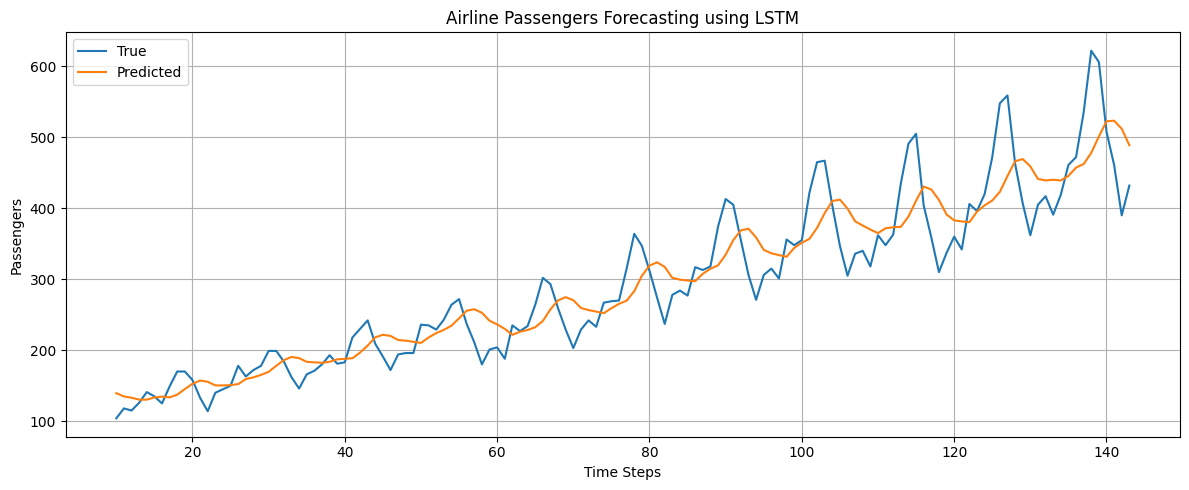

In [6]:
predicted = model.predict(X)
predicted_rescaled = scaler.inverse_transform(predicted)
y_rescaled = scaler.inverse_transform(y)

plt.style.use("dark_background")
plt.figure(figsize=(12, 5))
plt.plot(range(window_size, len(data)), y_rescaled, label='True')
plt.plot(range(window_size, len(data)), predicted_rescaled, label='Predicted')
plt.title("Airline Passengers Forecasting using LSTM")
plt.xlabel("Time Steps")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion

Based on the visualization of the true versus predicted passenger numbers, it can be observed that the LSTM model's predictions do match the periodic fluctuation of the data. This indicates that the model has effectively learned the underlying patterns and seasonality in the airline passenger data.

Furthermore, the model appears to capture the overall trend of increasing passenger numbers over time. The relatively low Mean Squared Error (MSE) during training suggests that the model achieved a good fit to the training data.
## Future Scope

While the model shows promising results in capturing the general trend and seasonality, there might be some discrepancies in predicting the exact peak and trough values at certain points. Further improvements could potentially be explored by:

*   Experimenting with different LSTM architectures or hyperparameter tuning.
*   Exploring other time series forecasting models for comparison.